In [212]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [213]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [214]:
NUM_CLASSES = 7

# 学習データ読み込み

In [215]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [216]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [218]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [219]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_20 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [221]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [222]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 17s 310ms/step - accuracy: 0.1016 - loss: 2.0057
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1757 - loss: 1.9196 - val_accuracy: 0.3305 - val_loss: 1.7279
Epoch 2/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2109 - loss: 1.7661
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.2594 - loss: 1.7364 - val_accuracy: 0.4225 - val_loss: 1.5793
Epoch 3/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3203 - loss: 1.6403
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.3319 - loss: 1.6105 - val_accuracy: 0.4382 - val_loss: 1.4475
Epoch 4/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2969 - loss: 1.5765
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [223]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8809 - loss: 0.4560


In [224]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [225]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[2.1276576e-04 9.0841466e-01 3.0803187e-02 3.9242741e-04 4.5074001e-02
 1.2320470e-02 2.7824789e-03]
1


# 混同行列

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


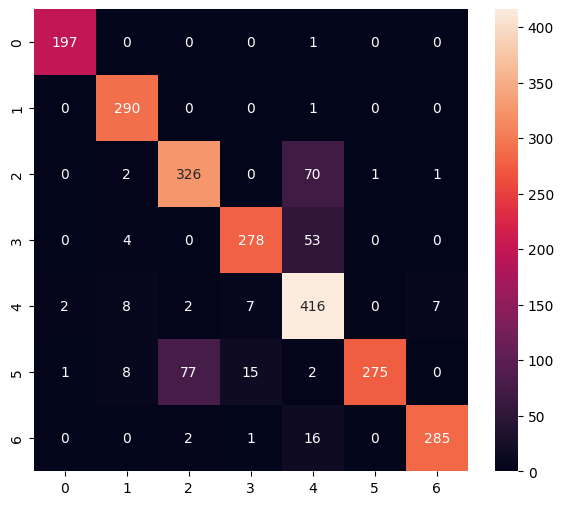

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.93      1.00      0.96       291
           2       0.80      0.81      0.81       400
           3       0.92      0.83      0.87       335
           4       0.74      0.94      0.83       442
           5       1.00      0.73      0.84       378
           6       0.97      0.94      0.95       304

    accuracy                           0.88      2348
   macro avg       0.91      0.89      0.89      2348
weighted avg       0.89      0.88      0.88      2348



In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [227]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [228]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/v7/wvcqbws145q765t9zybx3fs00000gn/T/tmpxtp7_w9c/assets


INFO:tensorflow:Assets written to: /var/folders/v7/wvcqbws145q765t9zybx3fs00000gn/T/tmpxtp7_w9c/assets


Saved artifact at '/var/folders/v7/wvcqbws145q765t9zybx3fs00000gn/T/tmpxtp7_w9c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  14261403488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14268764928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14278022768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14278168992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14265544768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14265544944: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1718307700.580807 13673833 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1718307700.580819 13673833 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.


6720

# 推論テスト

In [229]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [230]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [231]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [232]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 54 µs, sys: 22 µs, total: 76 µs
Wall time: 74.1 µs


In [233]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.1276556e-04 9.0841466e-01 3.0803189e-02 3.9242741e-04 4.5073990e-02
 1.2320464e-02 2.7824792e-03]
1
